In [55]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets
import seaborn as sns

In [56]:
# ========== Part 2: loading the data
boston = datasets.load_boston()
df = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])

# adding target variable to the dataframe
df['price'] = boston['target']

# checking if there's missing data
#df.isnull().sum() # no missing data

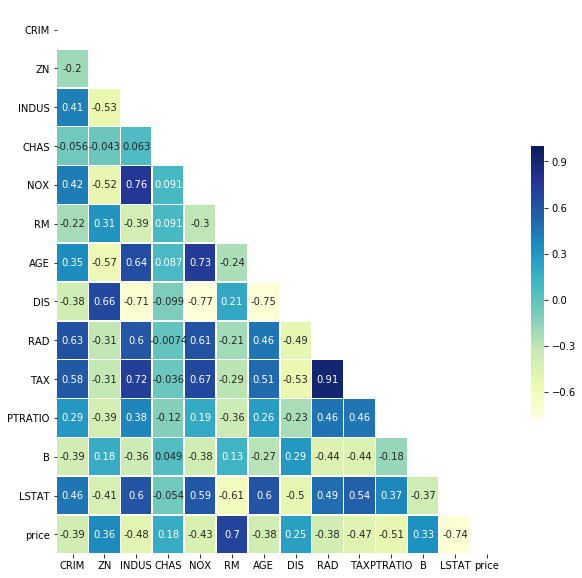

In [57]:
# visualizing the correlations with a heatmap
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap = "YlGnBu", linewidths=.5, cbar_kws={"shrink": .5});

In [58]:
# ========== Part 3: Train/Test split, Feature Normalization
X = df.iloc[:,:13].values
y = df.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [59]:
# ========== Part 4: Calculating the Cost J of theta
m = len(y_train)
X_train_padded = np.column_stack((np.ones((m,1)),X_train_std))
theta = np.zeros((X_train_padded.shape[1],1))

class CC(object):
    def ComputeCost(self,X,y,theta):
        m = len(y_train)
        # calculating the Cost J of theta
        J = 0
        sqr_err = np.power((X.dot(theta)-np.transpose([y_train])),2)
        J = (1/(2*m)) * sqr_err.sum(axis=0)
        return J
    
print('The initial Cost J of theta is \n')
print(CC().ComputeCost(X_train_padded,y_train,theta))


The initial Cost J of theta is 

[298.23093668]


In [60]:
# ========== Part 5: Gradient Descent (GD) algorithm to find the minimum of the Cost Function (J)
alpha = 0.01
epochs = 5000
J_history = []
iteration_nr = []

class GD(object):
    def GradientDescent(self,alpha,epochs):
        theta = np.zeros((X_train_padded.shape[1],1))
        n = float(len(y_train))
        
        for i in range(epochs):
            iter =i+1
            J = 0
            sqr_err = np.power((X_train_padded.dot(theta)-np.transpose([y_train])),2)
            J = (1.0/(2*m)) * sqr_err.sum(axis=0)
            J_history.append(J)
            iteration_nr.append(iter)
            
            # updating theta values
            gradient = (1.0/n) * X_train_padded.T.dot(X_train_padded.dot(theta)-np.transpose([y_train]))
            theta = theta - alpha * gradient 
            
        return theta

print('The Gradient Descent Algorithm converged on the following theta values \n')
print(GD().GradientDescent(alpha,epochs))
final_theta = GD().GradientDescent(alpha,epochs)

The Gradient Descent Algorithm converged on the following theta values 

[[22.60870712]
 [-0.96516844]
 [ 1.03629244]
 [-0.07476765]
 [ 0.59854386]
 [-1.79845349]
 [ 2.61542936]
 [-0.20399491]
 [-3.00194125]
 [ 2.0033843 ]
 [-1.84554568]
 [-2.15398037]
 [ 0.75018314]
 [-3.58831467]]


In [61]:
# ========== Part 6: making a prediction on the basis of the final theta for the unseen testing data and calculating
# the Cost
m = len(y_test)
X_test_padded = np.column_stack((np.ones((m,1)),X_test_std))

#y_test_pred = X_test_padded.dot(final_theta)

class CCost(object):
    def ComputeCost_test(self,X,y,theta):
        m = len(y_test)
        
        # compute the Cost J of theta for final_theta
        J = 0
        sqr_err = np.power((X_test_padded.dot(final_theta)-np.transpose([y_test])),2)
        J = (1.0/(2*m)) * sqr_err.sum(axis=0)
        return J

print('Final Cost J of theta for the Testing Data is \n')
print(CCost().ComputeCost_test(X_test_padded,y_test,final_theta))


Final Cost J of theta for the Testing Data is 

[15.31643058]


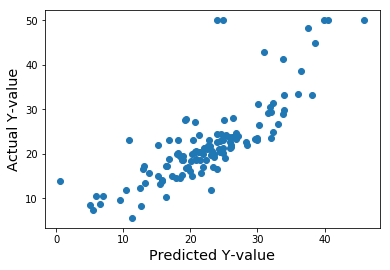

In [62]:
y_test_pred = X_test_padded.dot(final_theta)

plt.figure()
plt.scatter(y_test_pred[:],y_test[:]);
plt.xlabel('Predicted Y-value',fontsize='x-large')
plt.ylabel('Actual Y-value',fontsize='x-large')
plt.show()